In [119]:
# import packages
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [120]:
# import dataset

df = pd.read_csv("../../data/01-modified-data/cleaned_text_data_with_topics.csv")
df.head()

,Unnamed: 0,0,1,2,3,Topic
0,0,gizmodocom,mack degeurin,school surveillance tools are harming kids and...,2023-09-23T12:00:00Z,Education
1,1,readwrite,meenakshi kalyani,top 10 enterprise software development compani...,2023-09-06T16:00:37Z,Technology
2,2,business insider,beatrice nolan,a japanese city is installing robots in classr...,2023-09-07T11:02:04Z,Technology
3,3,gma,katie kindelan,"drinking borax is a trend on social media, but...",2023-08-31T21:46:12Z,Health
4,4,bbc news,https://wwwfacebookcom/bbcnews,french shrug off muslim upset at abaya ban in ...,2023-09-09T00:36:12Z,Education


In [121]:
#Count Vectorization

vectorizer = CountVectorizer()

# Extract the titles and the topics
titles = df['2'].values
topics = df['Topic'].values

X = vectorizer.fit_transform(titles)

print(X)


  (0, 492)	1
  (0, 548)	1
  (0, 580)	1
  (0, 38)	1
  (0, 255)	1
  (0, 320)	1
  (0, 31)	1
  (0, 351)	1
  (0, 309)	1
  (0, 377)	1
  (0, 139)	1
  (0, 576)	1
  (0, 201)	1
  (0, 270)	1
  (0, 470)	1
  (0, 200)	1
  (1, 581)	1
  (1, 0)	1
  (1, 169)	1
  (1, 523)	1
  (1, 138)	1
  (1, 108)	1
  (1, 4)	1
  (2, 492)	1
  (2, 38)	1
  :	:
  (96, 10)	1
  (96, 563)	1
  (96, 243)	1
  (96, 540)	1
  (96, 354)	1
  (96, 306)	1
  (96, 286)	1
  (96, 168)	1
  (97, 493)	1
  (97, 471)	1
  (97, 408)	1
  (98, 456)	1
  (98, 629)	1
  (98, 144)	1
  (98, 474)	1
  (99, 563)	1
  (99, 567)	1
  (99, 399)	1
  (99, 263)	1
  (99, 632)	1
  (99, 225)	1
  (99, 442)	1
  (99, 527)	1
  (99, 641)	1
  (99, 160)	1


In [122]:
# Split data

X_train, X_test, y_train, y_test = train_test_split(X, topics, test_size=0.2, random_state= 42)



In [123]:
# Perform feature selection using chi-squared test

# SelectKBest allows us to select the top k features that have the strongest relationship with the output variable
k = 100 # we can try different k values 
chi2_selector = SelectKBest(chi2, k=k)
X_chi2_selected = chi2_selector.fit_transform(X, topics)

feature_names = vectorizer.get_feature_names_out()

chi2_scores = chi2_selector.scores_
p_values = chi2_selector.pvalues_

features_chi2 = list(zip(feature_names, chi2_scores, p_values))
sorted_features_chi2 = sorted(features_chi2, key=lambda x: x[1], reverse=True)

top_k_features = sorted_features_chi2[:k]

top_k_features_df = pd.DataFrame(top_k_features, columns=['Feature', 'Chi2 Score', 'P-Value'])

top_k_features_df.head(20)

,Feature,Chi2 Score,P-Value
0,iit,64.666667,5.045799e-12
1,22,49.000000,7.455949e-09
2,borax,49.000000,7.455949e-09
3,buy,49.000000,7.455949e-09
4,dance,49.000000,7.455949e-09
5,disney,49.000000,7.455949e-09
6,doctors,49.000000,7.455949e-09
7,drinking,49.000000,7.455949e-09
8,health,49.000000,7.455949e-09
9,isn,49.000000,7.455949e-09


In [124]:
# Apply Naive Bayes

X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
X_test_chi2 = chi2_selector.transform(X_test)

# Train a new Naive Bayes classifier using the selected features
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_chi2, y_train)

# Predict the topics on the test set using the new classifier
y_pred = nb_classifier.predict(X_test_chi2)

# Calculate the accuracy of the new model
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

               precision    recall  f1-score   support

    Education       1.00      0.17      0.29         6
Entertainment       0.00      0.00      0.00         1
       Health       0.00      0.00      0.00         1
        Other       0.47      0.88      0.61         8
     Politics       0.00      0.00      0.00         1
   Technology       0.25      0.33      0.29         3

     accuracy                           0.45        20
    macro avg       0.29      0.23      0.20        20
 weighted avg       0.52      0.45      0.37        20



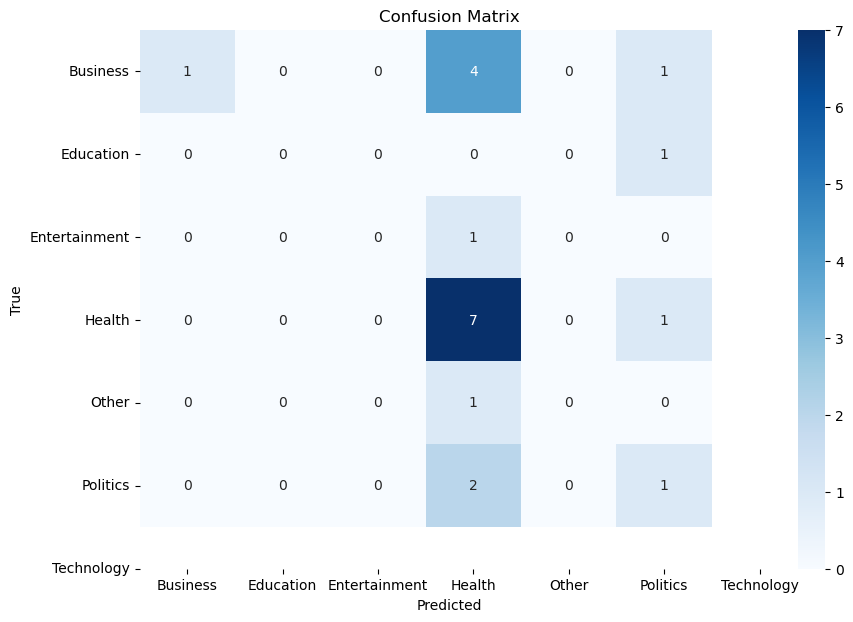

In [125]:
# Visualization -1

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

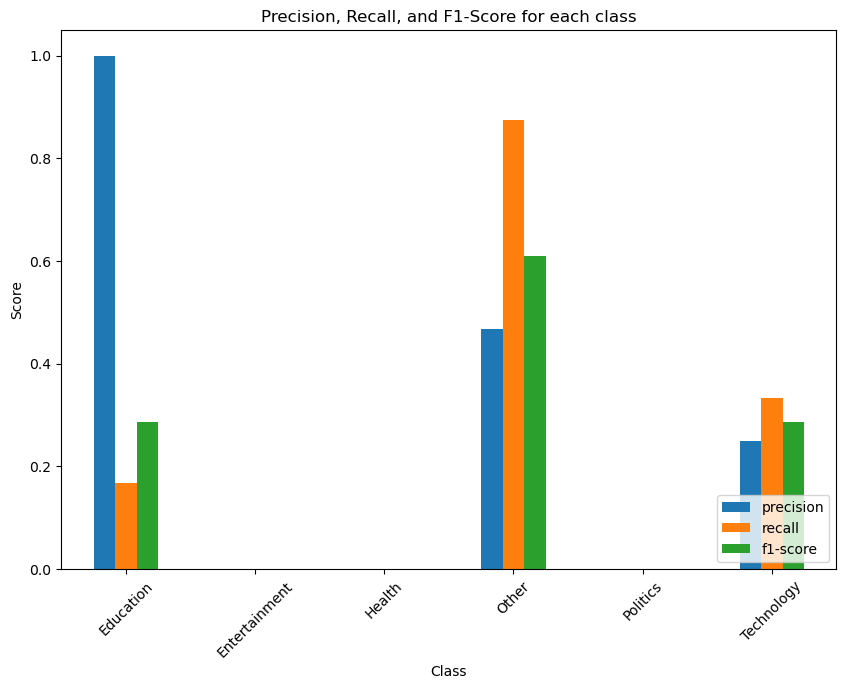

In [126]:
# Visualization -2

report_dict = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
report_df = pd.DataFrame(report_dict).transpose()
report_df.drop(report_df.tail(3).index, inplace=True)

# Plotting Precision, Recall, and F1-Score
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 7))
plt.title('Precision, Recall, and F1-Score for each class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()


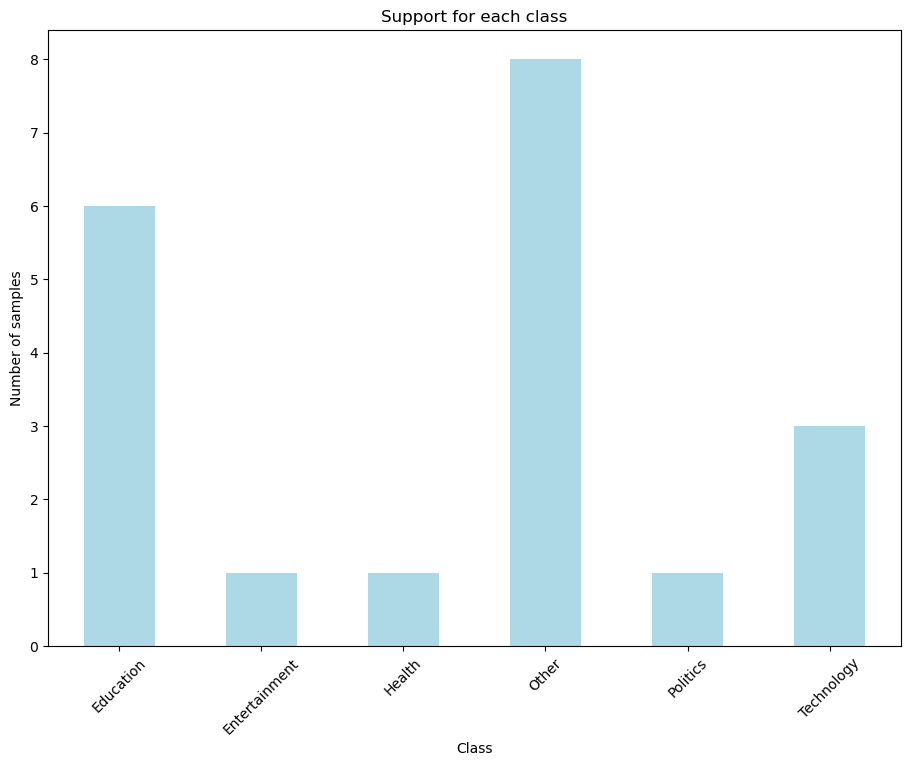

In [129]:
# Visualization -3

report_df['support'].plot(kind='bar', figsize=(11, 8), color='lightblue')
plt.title('Support for each class')
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.xticks(rotation=45)
plt.show()